In [1]:
import numpy as np
from sympy import diff
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def r(x):
    return round(x, 3)

task1

In [2]:
def f(x):
    return x*x-x

a = 1
b = 2
ua = 1
ub = -1
eps = 0.001

data = [
    # [K(x, c), Ua, Ub]
    ["1*x**2", ua, ub],
    ["2*x**2", ua, ub],
    ["0.1*x**2", ua, ub],
    ["1/x**2", ua, ub],
    ["1*x**2", -ua, ub],
    ["1*x**2", ua, -ub],
    ["1*x**2", -ua, -ub]
]

params = [
    # [K(x, c), dK(x,c)/dx, Ua, Ub]
    [k, str(diff(k, 'x')), ua, ub] for k, ua, ub in data
]

In [3]:
def решить(n, K_str, dK_str, ua, ub):
    def K(x):
        x = x
        res = eval(K_str)
        return res

    def dK(x):
        x = x
        res = eval(dK_str)
        return res

    xs = np.linspace(a, b, n)

    h = (b - a) / (n - 1)

    diags = [
        # [2*K(x) - h*dK(x) for x in xs],  # k-1
        # [h*dK(x) - 4*K(x) for x in xs],  # k
        # [2*K(x) for x in xs]   # k+1
        [2*K(x) for x in xs],  # k-1
        [-h*dK(x) - 4*K(x) for x in xs],  # k
        [h*dK(x) + 2*K(x) for x in xs]   # k+1
    ]

    syst = np.zeros((n, n))
    vec = [-2*h*h*f(x) for x in xs]

    for i in range(1, n-1):
        syst[i][i-1] = diags[0][i]  # k-1
        syst[i][i] = diags[1][i]  #k
        syst[i][i+1] = diags[2][i]  # k+1

    syst[0][0] = 1
    syst[-1][-1] = 1

    vec[0] = ua
    vec[-1] = ub

    ys = np.linalg.solve(syst, vec)

    return xs, ys


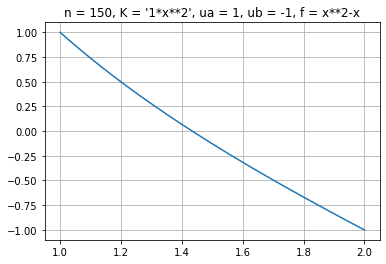

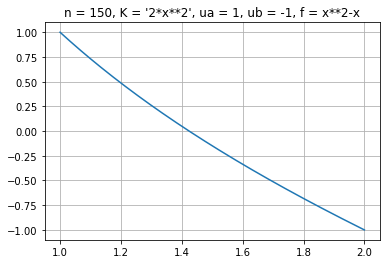

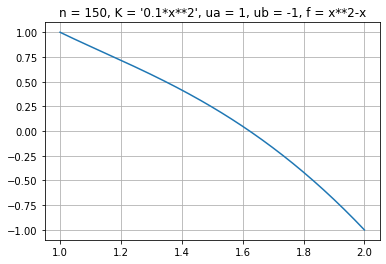

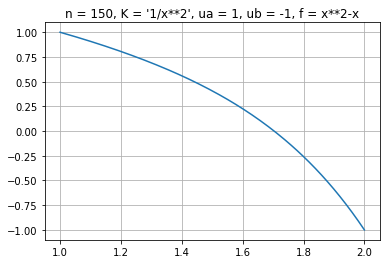

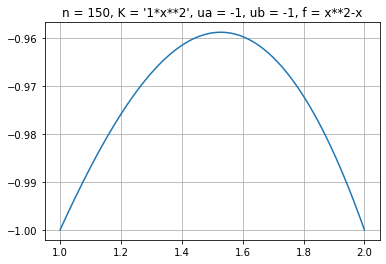

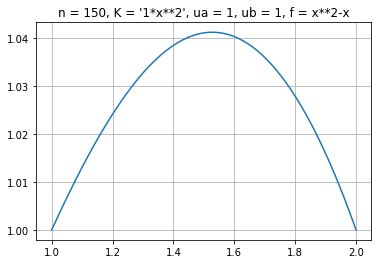

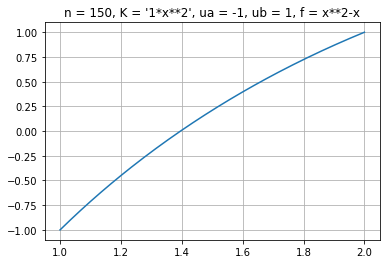

In [4]:
n = 150
for (K, dK, ua, ub) in params:
    xs, ys = решить(n, K, dK, ua, ub)

    plt.plot(xs, ys)
    plt.title(f'{n = }, {K = }, {ua = }, {ub = }, f = x**2-x')
    plt.grid()
    plt.show()


task2

In [5]:
a = 0
b = 1
ua = 0
ub = 0

n = 151
h = (b - a) / (n-1)

xs = np.arange(a, b+h, h)

C = 10

K = 2

ks = [
    # [k1, k2, k3, c1, c2]
    [K, 2*K, 0, (b + a)/2, 2*b],  # k1 << k2 
    [2*K, K, 0, (b + a)/2, 2*b],  # k1 >> k2
    [K, 2*K, 3*K, a + (b - a)/3, a + 2*(b - a)/3],  # k1 < k2 < k3
    [3*K, 2*K, K, a + (b - a)/3, a + 2*(b - a)/3],  # k1 > k2 > k3
    [K, 2*K , 3*K, a + (b - a)/3, a + 2*(b - a)/3], # k1 = k, k2 = 2*k, k3 = 3*k
    [20*K, K, 20*K, a + (b - a)/3, a + 2*(b - a)/3] # k1 = 20*k, k2 = k, k3 = 20*k
]

sources = [
    # [(x0, C)]
    [(r((b + a)/2), 10)],
    [(r((b + a)*0.2), 10), (r((b + a)*0.8), 10)],
    [(r((b + a)*0.2), 10), (r((b + a)*0.8), 20)]
]

In [6]:
def an(x, k1, k2, k3, c1, c2):
    if x < c1:
        return k1
    elif x-h < c1 < x:
        return h / ((c1 - x + h) / k1 + (x - c1) / k2)
    elif x <= c2:
        return k2
    elif x-h < c2 < x:
        return h / ((c2 - x + h) / k2 + (x - c2) / k3)
    else:
        return k3

def bn(x, k1, k2, k3, c1, c2):
    if x < c1:
        return k1
    elif x < c1 < x+h:
        return h / ((c1 - x) / k1 + (x+h - c1) / k2)
    elif x+h <= c2:
        return k2
    elif x < c2 < x+h:
        return h / ((c2 - x) / k2 + (x+h - c2) / k3)
    else:
        return k3

eps = 1e-3
def f(x, x0, C):
    if abs(x-x0) < eps:
        return C
    return 0



In [7]:
def решить(k, source):
    syst = np.zeros((n, n))
    vec = [0] * n

    data = [
        [an(x, *k) for x in xs],
        [-(an(x, *k) + bn(x, *k)) for x in xs],
        [bn(x, *k) for x in xs]
    ]
    vec = [-h * sum((f(x, x0, C) for x0, C in source)) for x in xs]
        
    for i in range(1, n - 1):
        syst[i][i - 1] = data[0][i]
        syst[i][i] = data[1][i]
        syst[i][i + 1] = data[2][i]

    syst[0][0] = 1
    syst[-1][-1] = 1

    vec[0] = ua
    vec[-1] = ub

    ys = np.linalg.solve(syst, vec)

    return xs, ys


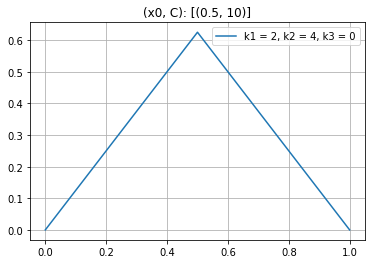

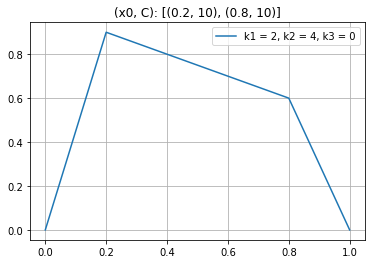

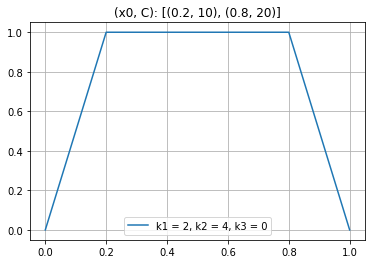

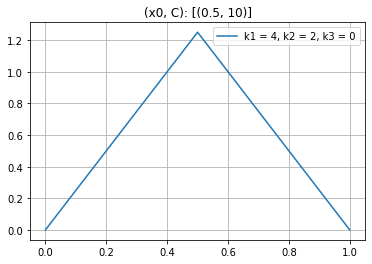

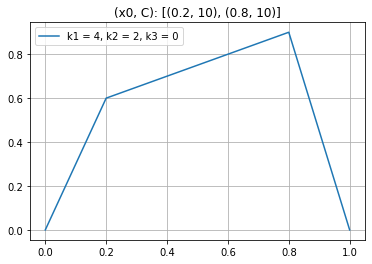

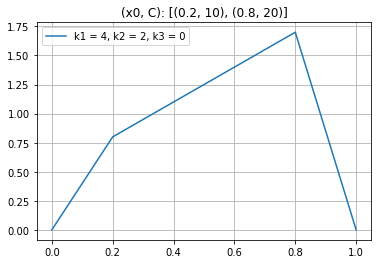

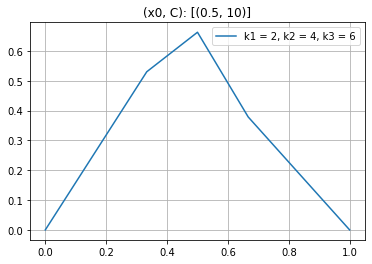

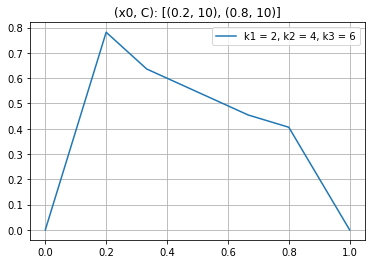

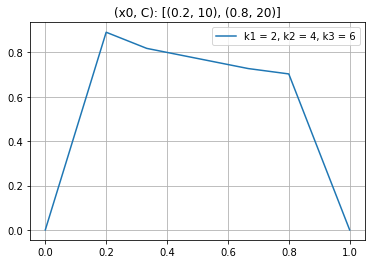

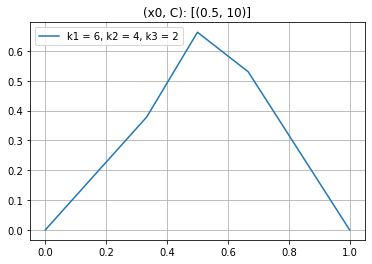

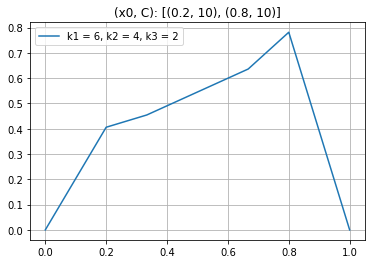

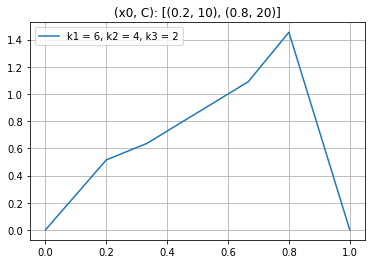

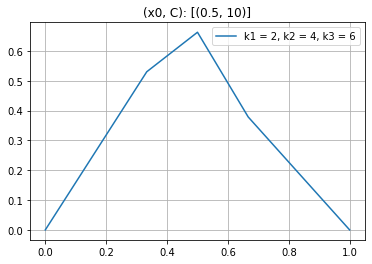

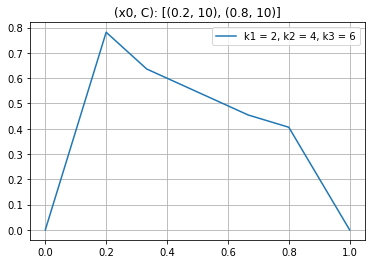

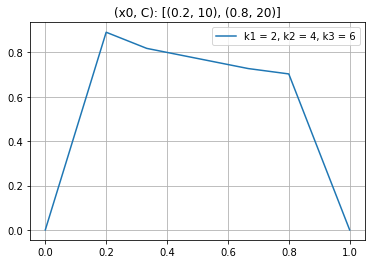

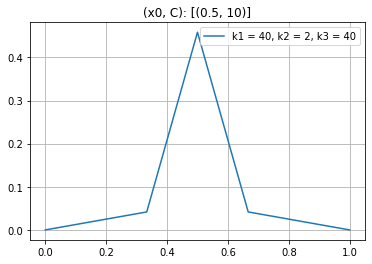

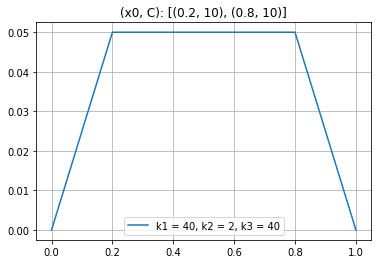

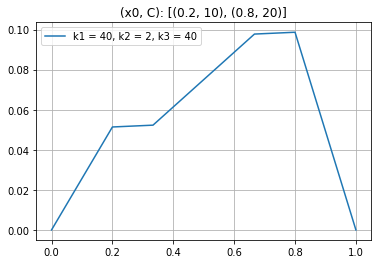

In [8]:
for k in ks:
    for source in sources:
        xs, ys = решить(k, source)
        k1 = k[0]
        k2 = k[1]
        k3 = k[2]

        plt.plot(xs, ys, label=f'{k1 = }, {k2 = }, {k3 = }')
        plt.title("(x0, C): " + str(source))
        plt.legend()
        plt.grid()
        plt.show()
    

task3

In [9]:
a = 0.2
b = 1.2
ua = 4
ub = 1

dx = 0.05
dt = 0.001

N = round((b - a)/dx) + 1
T = 201


In [10]:
def k(x):
    return x

def f(x):
    return 4*x*x*x + 6

def phi(x):
    return -10*x*x + 11*x + 2.2

In [11]:
def решить():
    xs = np.linspace(a, b, N)

    syst = np.zeros((T, N))
    syst[:,0] = [ua] * T
    syst[:,-1] = [ub] * T
    syst[0,:] = [phi(x) for x in np.linspace(a, b, N)]

    for i in range(1, T):
        for j in range(1, N-1):
            x = xs[j]
            syst[i][j] = k(x + dx/2)*syst[i-1][j+1]*dt/(dx*dx) + \
                      (1 - (k(x + dx/2) + k(x - dx/2))*dt/(dx*dx)) * syst[i-1][j] + \
                      k(x - dx/2)*syst[i-1][j-1]*dt/(dx*dx) + \
                      dt*f(x)*(1 - np.exp(-i*dt))
    return xs, syst


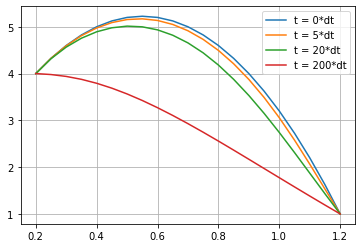

In [12]:
xs, syst = решить()

for t in [0, 5, 20, 200]:
    ys = syst[t]
    plt.plot(xs, ys, label=f't = {t}*dt')
plt.legend()
plt.grid()
plt.show()

task4

In [13]:
a = -1
b = 1
ua = 1
ub = 1
k = 0.5

dx = 0.05
dt = 0.5*(h*h/k)

N = round((b - a)/dx) + 1
T = 21


In [14]:
def f(x):
    return 0

def phi(x):
    return abs(x)

In [15]:
def решить():
    xs = np.linspace(a, b, N)

    syst = np.zeros((T, N))
    syst[:,0] = [ua] * T
    syst[:,-1] = [ub] * T
    syst[0,:] = [phi(x) for x in np.linspace(a, b, N)]

    for i in range(1, T):
        for j in range(1, N-1):
            x = xs[j]
            syst[i][j] = k*syst[i-1][j+1]*dt/(dx*dx) + \
                      (1 - (k + k)*dt/(dx*dx)) * syst[i-1][j] + \
                      k*syst[i-1][j-1]*dt/(dx*dx) + \
                      dt*f(x)*(1 - np.exp(-i*dt))
    return xs, syst

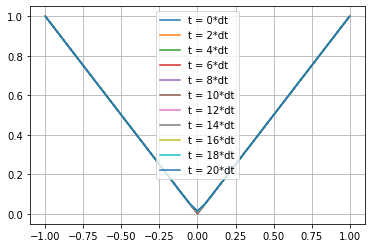

In [16]:
xs, syst = решить()

for t in range(0, len(syst), 2):
    ys = syst[t]
    plt.plot(xs, ys, label=f't = {t}*dt')
plt.legend()
plt.grid()
plt.show()